## A Perceptron with default parameter values

We start by importing the libraries.

In [3]:
%load_ext autoreload
%autoreload 2

from utils import config
from utils import ProcessDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading Latin and Greek train data.

The data consists of 1025 columns, 1024 columns for each pixel and 1 row specifying the character it represents.

In [158]:
Latin_Train = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TRAIN_SET))
Latin_X_Train = Latin_Train[:,0:1024]
Latin_Y_Train = Latin_Train[:,1024]

Greek_Train = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TRAIN_SET))
Greek_X_Train = Greek_Train[:,0:1024]
Greek_Y_Train = Greek_Train[:,1024]

### Training the perceptron model

In [167]:
clf_latin = Perceptron()
clf_latin.fit(Latin_X_Train,Latin_Y_Train)
print(clf_latin.score(Latin_X_Train,Latin_Y_Train))

clf_greek = Perceptron()
clf_greek.fit(Greek_X_Train,Greek_Y_Train)
print(clf_greek.score(Greek_X_Train,Greek_Y_Train))

0.9941471571906354
0.842287472752917


## Predicting new values

First we load the test dataset and then use the model to predict what character they are.

In [168]:
Latin_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_NOLABEL))
Latin_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_LABEL))[:,1024]

Greek_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_NOLABEL))
Greek_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_LABEL))[:,1024]

In [176]:
Latin_Y_Pred = clf_latin.predict(Latin_X_Test)
pd.DataFrame(Latin_Y).to_csv("./Output/PER-DS1.csv", header=None)

Greek_Y_Pred = clf_greek.predict(Greek_X_Test)
pd.DataFrame(Greek_Y).to_csv("./Output/PER-DS2.csv", header=None)

## Finding out how accurate our model is

### 1. Confusion Matrix

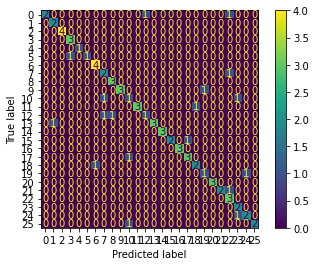

In [170]:
plot_confusion_matrix(clf_latin, Latin_X_Test, Latin_Y_Test)
plt.show()

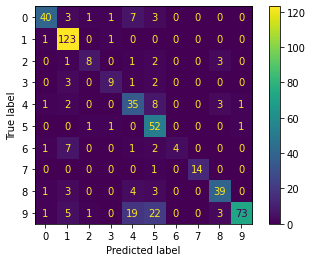

In [175]:
plot_confusion_matrix(clf_greek, Greek_X_Test, Greek_Y_Test)
plt.show()

### 2. Precision, recall, and f1-measure for each class

In [171]:
ProcessDataset.calculate_PRF(Latin_Y_Test, Latin_Y_Pred)

,precision,recall,f1
0,1.000000,0.500000,0.666667
1,0.666667,1.000000,0.800000
2,1.000000,1.000000,1.000000
3,0.750000,1.000000,0.857143
4,1.000000,1.000000,1.000000
5,1.000000,0.500000,0.666667
6,0.800000,1.000000,0.888889
7,0.500000,0.666667,0.571429
8,0.750000,1.000000,0.857143
9,1.000000,0.750000,0.857143


In [172]:
ProcessDataset.calculate_PRF(Greek_Y_Test, Greek_Y_Pred)

,precision,recall,f1
0,0.888889,0.727273,0.800000
1,0.836735,0.984000,0.904412
2,0.727273,0.533333,0.615385
3,0.750000,0.600000,0.666667
4,0.514706,0.700000,0.593220
5,0.547368,0.945455,0.693333
6,1.000000,0.266667,0.421053
7,1.000000,0.933333,0.965517
8,0.812500,0.780000,0.795918
9,0.973333,0.588710,0.733668


### 3. Accuracy, macro-average f1 and weighted-average f1 of the model

#### Perceptron model on DS1

In [173]:
print("Accuracy of perceptron model on DS1: " + str(accuracy_score(Latin_Y_Test, Latin_Y_Pred)*100)+"%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of perceptron model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of perceptron model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='weighted')*100)+"%")

Accuracy of perceptron model on DS1: 77.21518987341773%
Macro-average f1 of perceptron model on DS1: 76.65140415140415%
Weighted-average f1 of perceptron model on DS1: 77.25537472372915%


#### Perceptron model on DS2

In [174]:
print("Accuracy of perceptron model on DS1: " + str(accuracy_score(Greek_Y_Test, Greek_Y_Pred)*100)+"%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of perceptron model on DS1: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of perceptron model on DS1: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='weighted')*100)+"%")

Accuracy of perceptron model on DS1: 76.49325626204238%
Macro-average f1 of perceptron model on DS1: 71.89173301087288%
Weighted-average f1 of perceptron model on DS1: 76.23235663488833%
